In [2]:
pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Se redimensionarán las imágenes para trabajarlas a 150x150 pixeles
IMG_WIDTH, IMG_HEIGHT = 150, 150

# Se definen las rutas de las carpetas de entrenamiento y validación


train_dir = "C:/Users/adria/ProyectoDL/imgs/train"
validation_dir = "C:/Users/adria/ProyectoDL/imgs/validation"
# Crear un generador de imágenes para el preprocesamiento de los datos
train_datagen = ImageDataGenerator(
    rescale=1./255,             # Normalizar imágenes
    shear_range=0.2,            # Transformación aleatoria
    zoom_range=0.2,             # Zoom aleatorio
    horizontal_flip=True)       # Volteo horizontal de las imágenes

# Imágenes de entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=32,
    class_mode='categorical')    # Modo categórico para múltiples clases

# Imágenes para la validación (solo rescalado)
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=32,
    class_mode='categorical')

Found 17413 images belonging to 10 classes.
Found 2485 images belonging to 10 classes.


In [4]:
from tensorflow.keras import layers, models

# Definimos la arquitectura de la CNN
model = models.Sequential()

# Primera capa convolucional + MaxPooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Segunda capa convolucional + MaxPooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Tercera capa convolucional + MaxPooling
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Cuarta capa convolucional + MaxPooling
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Aplanar las capas
model.add(layers.Flatten())

# Añadir una capa densa completamente conectada
model.add(layers.Dense(512, activation='relu'))

# Capa de salida con softmax para clasificación 
model.add(layers.Dense(10, activation='softmax'))   # 10 clases (c0 - c9)

# Compilación del modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

C:\Users\adria\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457,738 (13.19 MB)

 Trainable params: 3,457,738 (13.19 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size)

Epoch 1/5


C:\Users\adria\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


544/544 ━━━━━━━━━━━━━━━━━━━━ 767s 1s/step - accuracy: 0.2605 - loss: 1.9712 - val_accuracy: 0.8856 - val_loss: 0.3538
Epoch 2/5
  1/544 ━━━━━━━━━━━━━━━━━━━━ 3:31 389ms/step - accuracy: 0.9375 - loss: 0.3286

C:\Users\adria\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 523us/step - accuracy: 0.9375 - loss: 0.3286 - val_accuracy: 0.9048 - val_loss: 0.2322
Epoch 3/5
544/544 ━━━━━━━━━━━━━━━━━━━━ 449s 814ms/step - accuracy: 0.8811 - loss: 0.3731 - val_accuracy: 0.9387 - val_loss: 0.1884
Epoch 4/5
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 309us/step - accuracy: 0.8125 - loss: 0.3267 - val_accuracy: 0.9048 - val_loss: 0.3657
Epoch 5/5
517/544 ━━━━━━━━━━━━━━━━━━━━ 20s 767ms/step - accuracy: 0.9388 - loss: 0.1928

In [12]:
# Evaluar el modelo en el conjunto de validación
loss, accuracy = model.evaluate(validation_generator)
print(f"Accuracy en validación: {accuracy*100:.2f}%")

78/78 ━━━━━━━━━━━━━━━━━━━━ 23s 291ms/step - accuracy: 0.9611 - loss: 0.1099
Accuracy en validación: 96.22%


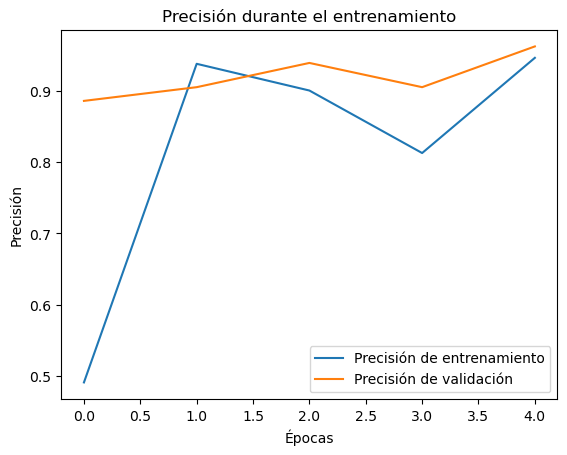

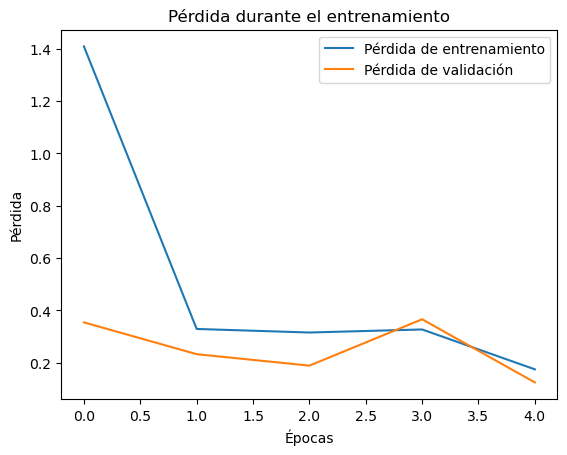

In [13]:
import matplotlib.pyplot as plt

# Graficar la precisión
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

# 1. Preparar el generador de datos para el conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1./255)  # Solo rescalado, sin aumentación

test_generator = test_datagen.flow_from_directory(
    "C:/Users/adria/ProyectoDL/imgs/test",         # Ruta al conjunto de prueba
    target_size=(150, 150),                        # Tamaño de las imágenes que espera el modelo
    batch_size=32,                                 # Tamaño de lote
    class_mode='categorical',                      # Cambiar a 'categorical' para múltiples clases
    shuffle=False                                  # No barajar para mantener el orden
)

# 2. Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(test_generator)
print(f"Pérdida en prueba: {loss:.4f}")
print(f"Precisión en prueba: {accuracy*100:.2f}%")

# 3. Realizar predicciones individuales
# Ruta de la imagen que deseas probar
img_path = "C:/Users/adria/ProyectoDL/imgs/test/c4/c4.jpg"  # Cambia a la ruta de tu imagen de prueba

# Cargar la imagen y procesarla
img = load_img(img_path, target_size=(150, 150))  # Redimensionar
img_array = img_to_array(img) / 255.0             # Convertir a tensor y normalizar
img_array = np.expand_dims(img_array, axis=0)     # Agregar dimensión de lote

# Predecir la clase de la imagen
prediction = model.predict(img_array)

# Interpretar la predicción
class_indices = test_generator.class_indices       # Diccionario de clases
class_labels = list(class_indices.keys())          # Etiquetas de clases

predicted_class = np.argmax(prediction[0])         # Clase con mayor probabilidad
predicted_label = class_labels[predicted_class]    # Etiqueta de la clase predicha

print(f"Predicción: Clase {predicted_class} ({predicted_label})")



Found 2528 images belonging to 10 classes.
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 298ms/step - accuracy: 0.9673 - loss: 0.1326
Pérdida en prueba: 0.1515
Precisión en prueba: 96.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Predicción: Clase 7 (c7)


In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import os
import random

# 1. Preparar el generador de datos para el conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1./255)  # Solo rescalado, sin aumentación

test_generator = test_datagen.flow_from_directory(
    "C:/Users/adria/ProyectoDL/imgs/test",         # Ruta al conjunto de prueba
    target_size=(150, 150),                        # Tamaño de las imágenes que espera el modelo
    batch_size=32,                                 # Tamaño de lote
    class_mode='categorical',                      # Cambiar a 'categorical' para múltiples clases
    shuffle=False                                  # No barajar para mantener el orden
)

# 2. Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(test_generator)
print(f"Pérdida en prueba: {loss:.4f}")
print(f"Precisión en prueba: {accuracy*100:.2f}%")

# 3. Seleccionar una imagen aleatoria
# Directorio de prueba
test_dir = "C:/Users/adria/ProyectoDL/imgs/test"

# Seleccionar una clase al azar
class_folders = os.listdir(test_dir)
random_class = random.choice(class_folders)  # Elegir una clase aleatoria

# Seleccionar una imagen al azar de la clase elegida
class_path = os.path.join(test_dir, random_class)
image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
random_image = random.choice(image_files)

# Ruta completa de la imagen
img_path = os.path.join(class_path, random_image)
print(f"Imagen seleccionada: {img_path}")

# Cargar la imagen y procesarla
img = load_img(img_path, target_size=(150, 150))  # Redimensionar
img_array = img_to_array(img) / 255.0             # Convertir a tensor y normalizar
img_array = np.expand_dims(img_array, axis=0)     # Agregar dimensión de lote

# Predecir la clase de la imagen
prediction = model.predict(img_array)

# Interpretar la predicción
class_indices = test_generator.class_indices       # Diccionario de clases
class_labels = list(class_indices.keys())          # Etiquetas de clases

predicted_class = np.argmax(prediction[0])         # Clase con mayor probabilidad
predicted_label = class_labels[predicted_class]    # Etiqueta de la clase predicha

print(f"Predicción: Clase {predicted_class} ({predicted_label})")


Found 10 images belonging to 10 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.0000e+00 - loss: 8.3806
Pérdida en prueba: 8.3806
Precisión en prueba: 0.00%
Imagen seleccionada: C:/Users/adria/ProyectoDL/imgs/test\c8\c8.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicción: Clase 5 (c5)


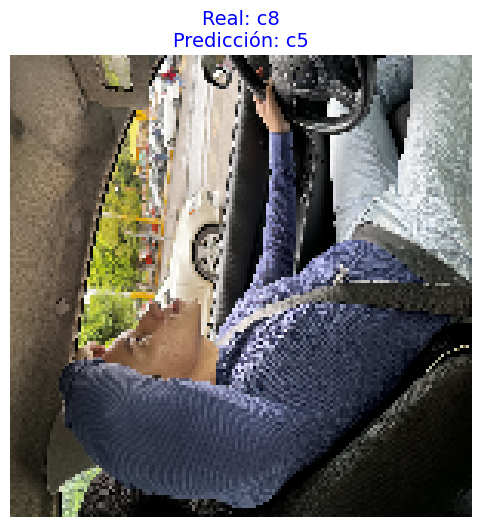

In [32]:
import matplotlib.pyplot as plt

# Muestra la imagen seleccionada con las predicciones
plt.figure(figsize=(6, 6))
plt.imshow(img) 
plt.axis('off')  


actual_label = random_class  
plt.title(f"Real: {actual_label}\nPredicción: {predicted_label}", fontsize=14, color='blue')

plt.show()


In [17]:
model.save('modelo_entrenado.h5') #Se almacena el MODELO para hacer uso en real time


In [18]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array

# Definir tamaño de entrada de las imágenes
IMG_WIDTH, IMG_HEIGHT = 150, 150

# Cargar el modelo entrenado
model = tf.keras.models.load_model('modelo_entrenado.h5')  # Asegúrate de guardar tu modelo tras entrenarlo

# Etiquetas de las clases (deberían coincidir con las clases usadas en el entrenamiento)
class_labels = list(train_generator.class_indices.keys())  # Cambia `train_generator` por tu generador de entrenamiento

# Inicia la webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        print("No se pudo acceder a la webcam.")
        break

    # Redimensionar el fotograma al tamaño esperado por el modelo
    resized_frame = cv2.resize(frame, (IMG_WIDTH, IMG_HEIGHT))
    
    # Convertir el fotograma al formato esperado (igual que en el entrenamiento)
    preprocessed_frame = img_to_array(resized_frame) / 255.0  # Normalizar (rescale)
    preprocessed_frame = np.expand_dims(preprocessed_frame, axis=0)  # Agregar dimensión de lote

    # Realizar la predicción
    predictions = model.predict(preprocessed_frame)
    predicted_class = np.argmax(predictions)
    confidence = np.max(predictions)
    
    # Obtener el nombre de la clase predicha
    predicted_label = class_labels[predicted_class]
    
    # Mostrar el resultado en el fotograma
    text = f"{predicted_label} ({confidence*100:.2f}%)"
    cv2.putText(frame, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Mostrar el fotograma en la ventana
    cv2.imshow("Real-Time Prediction", frame)
    
    # Salir con la tecla 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


No se pudo acceder a la webcam.
